In [28]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('ViratKohli-ODI.xlsx')

In [3]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Match             308 non-null    object        
 1   Innings           296 non-null    float64       
 2   Date              308 non-null    datetime64[ns]
 3   M/Inns            304 non-null    object        
 4   Posn              308 non-null    object        
 5   Versus            308 non-null    object        
 6   Ground            308 non-null    object        
 7   How Dismissed     308 non-null    object        
 8   Runs              308 non-null    object        
 9   B/F               308 non-null    object        
 10  S/R               308 non-null    object        
 11  Progressive-Runs  308 non-null    int64         
 12  Progressive-B/F   308 non-null    int64         
 13  Progressive-Avg   308 non-null    float64       
 14  Progressive-S/R   308 non-

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Innings,296.0,148.500000,85.592056,1.00,74.7500,148.50,222.2500,296.00
Progressive-Runs,308.0,6910.480519,4375.897862,12.00,2997.2500,6473.00,11105.0000,14557.00
Progressive-B/F,308.0,7578.116883,4596.356583,22.00,3581.7500,7195.00,11923.5000,15543.00
Progressive-Avg,308.0,52.078214,6.768001,12.00,49.1650,52.17,57.8175,60.31
Progressive-S/R,308.0,87.948377,6.428469,54.55,83.9075,89.91,92.9300,93.85


### cleaning "Runs"

In [6]:
runs = []
for i in df['Runs']:
    if str(i).rfind('*')!= -1:
        runs.append(i.split('*')[0])
    elif str(i).rfind('-')!= -1:
        runs.append(0)
    elif str(i).rfind('*') == -1:
        runs.append(i)
df['Runs'] = runs
df['Runs'] = df['Runs'].astype('int64')

### Adding "Captaincy"

In [7]:
captain = []
for i in df['Match']:
    if i.rfind('(c)')!=-1:
        captain.append('Yes')
    elif i.rfind('(c)')==-1:
        captain.append('No')
df['Captain'] = captain

### Cleaning "B/F"

In [8]:
df['B/F'].dtype

dtype('O')

In [9]:
bf = []
for i in df['B/F']:
    if str(i) == '-':
        bf.append(0)
    else:
        bf.append(i)
df['B/F'] = bf
df['B/F'] = df['B/F'].astype('int64')

### Cleaning "S/R"

In [10]:
df['S/R'].dtype

dtype('O')

In [11]:
sr = []
for i in df['S/R']:
    if str(i) == '-':
        sr.append(0)
    else:
        sr.append(i)
df['S/R'] = sr
df['S/R'] = df['S/R'].astype('float64')

### Creating "Dismissal Type"

In [12]:
dt = []
for i in df['How Dismissed']:
    if (i == 'run out'):
        dt.append(i) 
    elif str(i).rfind('hit wicket') != -1:
        dt.append('hit wicket')
    elif (i != 'did not bat') and (i!='not out'):
        dt.append(i.split(' ')[0])
    else:
        dt.append(i)
        
df['Dismissal Type'] = dt
df['Dismissal Type'] = df['Dismissal Type'].map({'lbw':'LBW' , 'c':'Caught',
                                                'run out':'Run Out' , 'b':'Bowled',
                                                'not out':'Not Out', 'did not bat':'Did Not Bat',
                                                'st':'Stumped', 'hit wicket':'Hit Wicket'})

### Cleaning "Innings"

In [13]:
df['M/Inns'].fillna('N/A - No Result',inplace=True,axis=0)

### Cleaning "Posn"

In [14]:
df.Posn.unique()

array([2, 1, 7, 4, '-', 3, 5, 6], dtype=object)

In [15]:
df['Posn'] = df['Posn'].replace({'-':0})

### Nulls

In [16]:
df.isnull().sum()

Match                0
Innings             12
Date                 0
M/Inns               0
Posn                 0
Versus               0
Ground               0
How Dismissed        0
Runs                 0
B/F                  0
S/R                  0
Progressive-Runs     0
Progressive-B/F      0
Progressive-Avg      0
Progressive-S/R      0
Captain              0
Dismissal Type       0
dtype: int64

### Nulls in innings indicate that we have a result for the match but Virat Kohli did not bat. 

In [17]:
df.head()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type
0,1,1.0,2008-08-18,1st,2,Sri Lanka,Rangiri Dambulla International Stadium,lbw b K M D N Kulasekara,12,22,54.55,12,22,12.00,54.55,No,LBW
1,2,2.0,2008-08-20,2nd,2,Sri Lanka,Rangiri Dambulla International Stadium,c C K Kapugedera b T Thushara,37,67,55.22,49,89,24.50,55.06,No,Caught
2,3,3.0,2008-08-24,1st,1,Sri Lanka,R Premadasa Stadium,run out,25,38,65.79,74,127,24.67,58.27,No,Run Out
3,4,4.0,2008-08-27,1st,1,Sri Lanka,R Premadasa Stadium,b T Thushara,54,66,81.82,128,193,32.00,66.32,No,Bowled
4,5,5.0,2008-08-29,2nd,1,Sri Lanka,R Premadasa Stadium,lbw b K M D N Kulasekara,31,46,67.39,159,239,31.80,66.53,No,LBW


### Save Clean data

In [18]:
# df.to_excel('ODI-Clean.xlsx',index=False)

### Mapping Grounds to State and Country
Used Chatgpt to get the geographical information of the grounds. 

In [19]:
df[df['Ground'] == 'Khan Shaheb Osman Ali Stadium']

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type
130,131 (c),124.0,2014-02-26,2nd,3,Bangladesh,Khan Shaheb Osman Ali Stadium,b Rubel Hossain,136,122,111.48,5581,6207,52.65,89.91,Yes,Bowled
131,132 (c),125.0,2014-02-28,1st,3,Sri Lanka,Khan Shaheb Osman Ali Stadium,b B A W Mendis,48,51,94.12,5629,6258,52.61,89.95,Yes,Bowled


In [20]:
sorted(df['Ground'].unique())

['Adelaide Oval',
 'Arun Jaitley Stadium',
 'Barabati Stadium',
 'Barsapara Cricket Stadium',
 'Bay Oval',
 'Bellerive Oval',
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium',
 'Boland Park',
 'Brabourne Stadium',
 'Brisbane Cricket Ground',
 'Captain Roop Singh Stadium',
 'Dr YS Rajasekhara Reddy Cricket Stadium',
 'Dubai International Cricket Stadium',
 'Eden Gardens',
 'Eden Park',
 'Edgbaston',
 'Green Park',
 'Greenfield International Stadium',
 'Harare Sports Club',
 'Headingley',
 'Himachal Pradesh Cricket Association Stadium',
 'Holkar Cricket Stadium',
 'JSCA International Stadium Complex',
 'Kennington Oval',
 'Kensington Oval',
 'Khan Shaheb Osman Ali Stadium',
 'Kingsmead',
 "Lord's",
 'M Chinnaswamy Stadium',
 'MA Chidambaram Stadium',
 'Madhavrao Scindia Cricket Ground',
 'Maharashtra Cricket Association Stadium',
 'Mahinda Rajapaksha International Cricket Stadium',
 'Manuka Oval',
 'McLean Park',
 'Melbourne Cricket Ground',
 'Narendra Modi Stadium',
 'Neh

In [21]:
df['Ground'].nunique()

71

In [22]:
df.shape

(308, 17)

In [23]:
grounds = pd.read_csv('Grounds.csv')

In [24]:
df = pd.merge(df,grounds,on='Ground' , how='left')

### Analysis

### Heat Map

<AxesSubplot:>

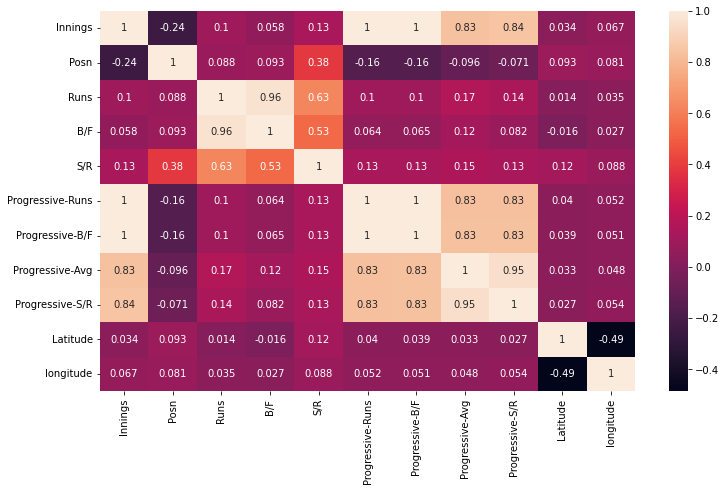

In [31]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

### Scores against each oppositions

In [56]:
df.groupby('Versus')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Versus,mean,count
0,Bangladesh,54.823529,17
1,South Africa,53.117647,34
2,West Indies,52.581395,43
3,New Zealand,50.212121,33
4,Australia,47.641509,53
5,Sri Lanka,47.357143,56
6,Pakistan,45.764706,17
7,Afghanistan,40.666667,3
8,Ireland,39.000000,2
9,England,36.763158,38


### Average Scores M/Innings

In [55]:
df.groupby('M/Inns')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,M/Inns,mean,count
0,2nd,48.538462,169
1,1st,47.066667,135
2,N/A - No Result,0.000000,4


### Mean scores at each batting positions

In [54]:
df.groupby('Posn')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Posn,mean,count
0,3,51.601660,241
1,4,45.307692,39
2,0,0.000000,12
3,1,28.750000,4
4,5,31.750000,4
5,7,9.500000,4
6,2,17.000000,3
7,6,23.000000,1


### How was he dismissed mostly? 

Caught         176
Not Out         47
Bowled          34
LBW             21
Run Out         12
Did Not Bat     12
Stumped          5
Hit Wicket       1
Name: Dismissal Type, dtype: int64


C:\Users\Sharan Kalyan\Anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


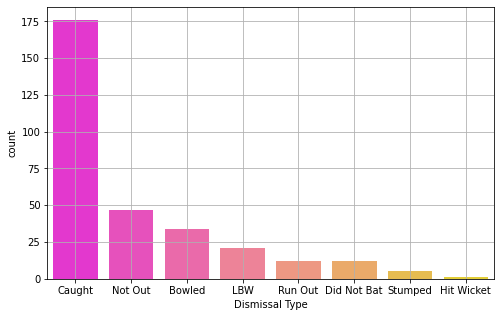

In [51]:
plt.figure(figsize=(8,5))
sns.countplot(df['Dismissal Type'],order = df['Dismissal Type'].value_counts().index,palette='spring')
plt.grid()
print(df['Dismissal Type'].value_counts())
plt.show()

### Does captaincy bring the best out of Virat? 

In [57]:
df.groupby('Captain')['Runs'].agg(['mean','count']).sort_values(by = 'count',ascending=False).reset_index()

,Captain,mean,count
0,No,42.760563,213
1,Yes,57.357895,95


### Mean Scores by Country

In [59]:
df.groupby('Country')['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Country,mean,count
0,Trinidad and Tobago,63.444444,9
1,Bangladesh,57.736842,19
2,Jamaica,54.500000,4
3,India,52.595238,126
4,South Africa,49.650000,20
5,Wales,49.000000,4
6,New Zealand,45.846154,13
7,Australia,43.781250,32
8,UAE,43.600000,5
9,Zimbabwe,40.555556,9


### Mean Scores in SENA Countries

In [60]:
sena = []
for i in df['Country']:
    if i in ('South Africa', 'England', 'Wales','New Zealand', 'Australia'):
        sena.append(1)
    else:
        sena.append(0)
df['SENA'] = sena

In [64]:
df.groupby(['SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,SENA,mean,count
0,0,48.657143,210
1,1,44.275510,98


### SENA Captaincy 

In [65]:
df.groupby(['Captain','SENA'])['Runs'].agg(['mean','count']).sort_values(by = 'mean',ascending=False).reset_index()

,Captain,SENA,mean,count
0,Yes,0,57.500000,60
1,Yes,1,57.114286,35
2,No,0,45.120000,150
3,No,1,37.142857,63


In [66]:
df.tail()

,Match,Innings,Date,M/Inns,Posn,Versus,Ground,How Dismissed,Runs,B/F,S/R,Progressive-Runs,Progressive-B/F,Progressive-Avg,Progressive-S/R,Captain,Dismissal Type,City,State/Province,Country,ICC Region,Latitude,longitude,SENA
303,304,292.0,2025-10-23,1st,3,Australia,Adelaide Oval,lbw b X C Bartlett,0,4,0.00,14181,15204,57.41,93.27,No,LBW,Adelaide,South Australia,Australia,Oceania,-34.9154,138.5960,1
304,305,293.0,2025-10-25,2nd,3,Australia,Sydney Cricket Ground,not out,74,81,91.36,14255,15285,57.71,93.26,No,Not Out,Sydney,New South Wales,Australia,Oceania,-33.8917,151.2247,1
305,306,294.0,2025-11-30,1st,3,South Africa,JSCA International Stadium Complex,c R D Rickelton b N Burger,135,120,112.50,14390,15405,58.02,93.41,No,Caught,Ranchi,Jharkhand,India,Asia,23.3147,85.2974,0
306,307,295.0,2025-12-03,1st,3,South Africa,Shaheed Veer Narayan Sing International Stadium,c A K Markram b L Ngidi,102,93,109.68,14492,15498,58.20,93.51,No,Caught,Raipur,Chhattisgarh,India,Asia,21.1615,81.7837,0
307,308,296.0,2025-12-06,2nd,3,South Africa,Dr YS Rajasekhara Reddy Cricket Stadium,not out,65,45,144.44,14557,15543,58.46,93.66,No,Not Out,Visakhapatnam,Andhra Pradesh,India,Asia,17.7974,83.3450,0
